# Notebook to visualize pathways

We load in the policies, run the model with them, and visualize some pathways.

## Imports

In [4]:
import sys
import os

sys.path.append(os.path.abspath('../../..'))

In [5]:
sys.path

['/Users/jhkwakkel/Documents/GitHub/pyNetLogo',
 '/Users/jhkwakkel/Documents/GitHub/EMAworkbench',
 '/Users/jhkwakkel/Documents/GitHub/Hippo-DAI-Lab/PyRICE/optimization/visualizations',
 '/Users/jhkwakkel/opt/anaconda3/lib/python39.zip',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/jhkwakkel/.ipython',
 '/Users/jhkwakkel/Documents/GitHub/Hippo-DAI-Lab/PyRICE',
 '/Users/jhkwakkel/Documents/GitHub/Hippo-DAI-Lab']

In [6]:
from PyRICE.optimization.visualizations.pathways import *

## Load policies

In [7]:
policies_WS = load_policies_of_one_problem_formulation('WEITZMAN_SUFFICIENTARIAN_200000_results.csv')
policies_WU = load_policies_of_one_problem_formulation('WEITZMAN_UTILITARIAN_200000_results.csv')
policies_NS = load_policies_of_one_problem_formulation('NORDHAUS_SUFFICIENTARIAN_200000_results.csv')
policies_NU = load_policies_of_one_problem_formulation('NORDHAUS_UTILITARIAN_200000_results.csv')

## Run model and obtain relevant variables

In [8]:
output_lists_WS = prepare_variables(policies_WS)
output_lists_WU = prepare_variables(policies_WU)
output_lists_NS = prepare_variables(policies_NS)
output_lists_NU = prepare_variables(policies_NU)

## Visualize pathways

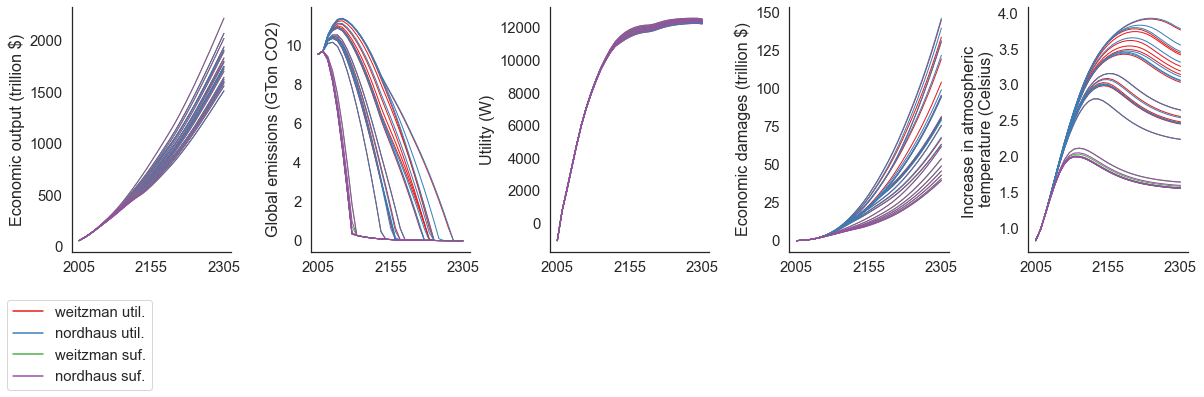

In [105]:
from matplotlib.ticker import MaxNLocator


sns.set(font_scale=1.35)
sns.set_style('white')

fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, figsize=(20,4.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.5, hspace=0.8)

labels = ['weitzman util.', 'nordhaus util.', 'weitzman suf.', 'nordhaus suf.']
artists = []
colors = sns.color_palette('Set1')


for i in range(len(labels)):
    color = colors[i]
    artist = plt.Line2D([0, 1], [0, 1], color=color)  # TODO
    artists.append(artist)
fig.legend(artists, labels, loc=2, bbox_to_anchor=(0.075,0))


ooi = ['Economic output (trillion $)','Global emissions (GTon CO2)',
       'Utility (W)', 'Economic damages (trillion $)',
       'Increase in atmospheric \ntemperature (Celsius)']

for i, ax in enumerate(axes.flatten()):

    for j, data in enumerate([output_lists_WU, output_lists_NU,
                              output_lists_WS, output_lists_NS]):
        color = colors[j]

        data = pd.DataFrame(data[i])
        data = data.reset_index(drop=True)

        ax.plot(data.T, c=color, lw=1)

    ax.xaxis.set_major_locator(MaxNLocator(3))
    ax.set_ylabel(ooi[i])

    sns.despine()
plt.show()

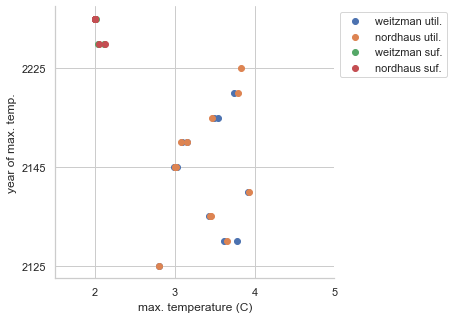

In [145]:
# make scatterplot of max temp against timing of max
# colorored by formulation

# for j, data in enumerate([output_lists_WU, output_lists_NU,
#                           output_lists_WS, output_lists_NS]):

sns.set(font_scale=1)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(5,5))
labels = ['weitzman util.', 'nordhaus util.', 'weitzman suf.', 'nordhaus suf.']
for j, data in enumerate([output_lists_WU, output_lists_NU,
                          output_lists_WS, output_lists_NS]):
    data = pd.DataFrame(data[4])
    data = data.reset_index(drop=True)
    max_temp = data.max(axis=1)
    year_of_max = data.idxmax(axis=1)
    ax.scatter(max_temp, year_of_max, label=labels[j])
ax.legend(bbox_to_anchor=(1,1))

ax.set_xlabel('max. temperature (C)')
ax.set_ylabel('year of max. temp.')

ax.set_xlim(xmin=1.5, xmax=5)
# ax.set_ylim(ymin=2100, ymax=2250)

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(3))

sns.despine()

plt.show()


array([<AxesSubplot:ylabel='Economic output (trillion $)'>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
col

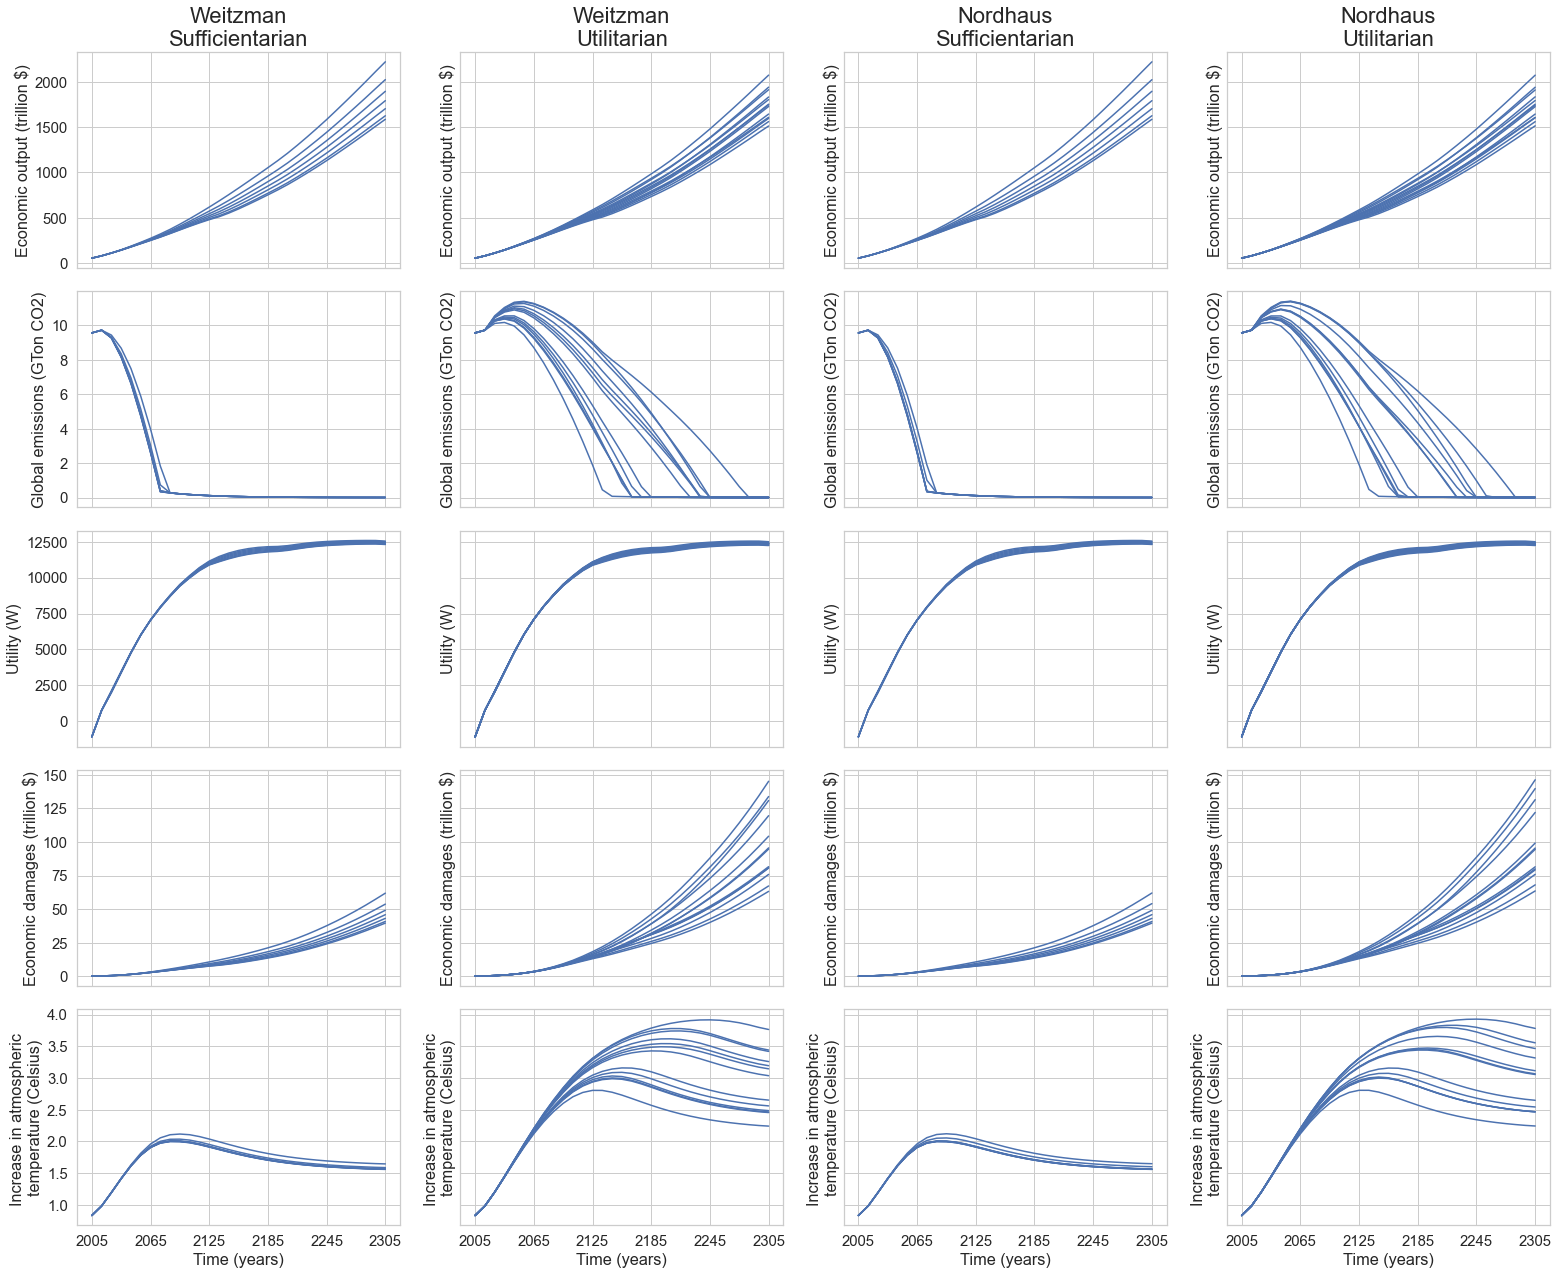

In [4]:
visualize(output_lists_WS, output_lists_WU, output_lists_NS, output_lists_NU, saving=True)